> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# IV:  Decision Tree

### *Assignement Instructions:*
- **Due date**: 11 PM, Oct. 29, 2021
- **File name**: ID_Name_HW4.ipynb
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by your so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [107]:
import datetime
# print("This code is written at " + str(datetime.datetime.now()))

In [108]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem statement

In clinical informatics, machine learning has been widely exploited to diagnose diseases. In this project, we will design a method for a medical diagnosis using machine learning that determines whether a patient has diabetes or not. To this end, we will implement a $Decision Tree$ model, and train/test the model with the Pima Indians Diabetes Data Set. The dataset provides the following information (features) for each patient.

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num-preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped-func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

A total number of samples (patients) are 768, where 500 patients are chosen as training samples ($\texttt{diabetes-training-data.csv}$), and the remaining 268 patients are test samples ($\texttt{diabetes-test-data.csv}$).

### P1. Decision Trees

P1.1 Implement a decision tree method for classification (```DecisionTrees``` class) (*60 points*) 

> **Instruction:** 
>
>The main design choice we would consider for the decision tree is the criterion for selecting the best split for each node. Instead of the classification error, we will implement a binary decision tree in this project by choosing features and thresholds that yield the largest improvement in terms of the **Gini impurity** at each node. That is, we  choose the features and thresholds greedly providing the minimum **weighted Gini impurity** for each node. Concretly, let's denote by $H$ a function computing the Gini impurity. The weighted Gini impurity for the $j$ th feature and the threshold value $t$ is then defined as follows:
>
>$
G(j,t) = \Big(\frac{N_\text{left}}{N}\Big) H(M_\text{left})  + \Big(\frac{N_\text{right}}{N}\Big) H(M_\text{right}),
$
>
>where $M_\text{left}$ and $M_\text{right}$ are subsets of training samples for left and right nodes, respectively, which are splitted from training samples of a parent node (e.g., diabetes for the left node and normal for the right node), according to the feature and threshold. This suggests that $M_\text{left}$ and $M_\text{right}$ could vary for different choices of features and thresholds, and our objective is to find the features and thresholds that give the minumum weighted Gini impurity for each node as follows:
>
>$
(j^*, t^*) = \operatorname{argmin}_{j, t}  G(j, t).
$
>
>This process is repeated until reaching at least one of stopping condtions.
>
>
> **Gini impurity:**
>
> Gini impurity measures the *impurity* of nodes and it is computed by 1- Gini. More formally, it can computed by summing the probability of an item labeled with the class i being chosen (denoted by $p_i$) times the probability  of a mistake in categorizing that item (i.e., $\sum _{k\neq i}p_{k}=1-p_{i}$). That is,
>
>$
{I}_{G}(p)=\sum_{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-p_{i}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}p_{i}^{2}=1-\sum _{i=1}^{J}p_{i}^{2},
$
>
>where $i\in \{1,2,...,J\}$, and $J$ is the number of classes. The Gini impurity reaches its minimum (zero), when all samples in the node fall into a single class. This suggests that the optimum split for the decision tree could be chosen by the features and thresholds with less Gini impurity. See for more details [Wiki](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)  
>
>
> **Implementation details:**  
> 1. We implement the decision tree using a Python dictionary data structure in a *Depth First Search (DFS)* manner. Each node could have various attributes, e.g., `feature`, `threshold`, `left`, `right`, `impurity`, `is_leaf`, and `prediction`. 
> 2. If we reach a leaf node, the prediction is done by the majority class.
> 3. Stopping condition
>> - All samples in a node have the same target value 
>> - No more features to split on
>4. Early stopping condition  
>> - The maximum depth level of a tree (`max_depth`) is reached.
>> - The data samples for a node is below `min_split`.
>> - The split does not improve the weighted Gini impurity.
>
>5. Hint: Use indicies and sorting for efficiency


P1.2 Plot the depth, the number of nodes and the classification accuracy on training samples and test samples by varying maximum depth levels of a decision tree from 1 to 15. (*10 points*)

P1.3 Implement a `traverse(self)` function that performs a *Breadth First Search (BFS)* on a (binary) decision tree to parse its properties, e.g., impurities of nodes, types of nodes, decision paths, and predictions. See the results below (**P1.3**) for example. (*10 points*)

In [109]:
from project4 import *

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

## Results

### Prepare training samples

In [111]:
train_csv_path = 'diabetes_training_data.csv'
test_csv_path = 'diabetes_testing_data.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [112]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [113]:
X_train, y_train = load_data(df_train)
X_test, y_test = load_data(df_test)

### Instantiate a decision tree classifier

In [119]:
my_clf = DecisionTree(max_depth = 4, min_splits = 5)

### P1.1


In [120]:
my_clf.fit(X_train, y_train)

In [121]:
y_pred  = my_clf.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.85
test accuracy: 0.6791044776119403


### P1.2

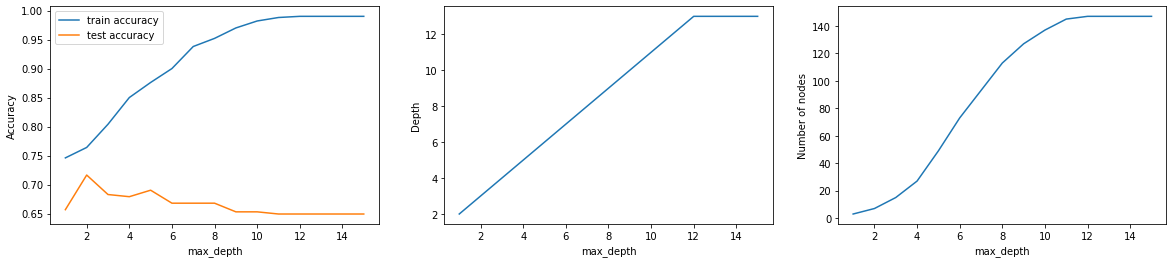

In [126]:
plot_graph(X_train, X_test, y_train, y_test, min_splits = 2)

### P1.3

In [134]:
my_clf.traverse()

node=0 is a split node: go to left node 1 if self.X[:, 1] <= 0.6131 else to right node 12: Impurity: 0.4526, Improvement: 0.1014, Prediction -> 0
	node=1 is a split node: go to left node 2 if self.X[:, 0] <= 0.3529 else to right node 7: Impurity: 0.2589, Improvement: 0.0285, Prediction -> 0
	node=12 is a split node: go to left node 13 if self.X[:, 1] <= 0.7739 else to right node 20: Impurity: 0.4765, Improvement: 0.0619, Prediction -> 1
		node=2 is a split node: go to left node 3 if self.X[:, 5] <= 0.6751 else to right node 6: Impurity: 0.1877, Improvement: 0.0196, Prediction -> 0
		node=7 is a split node: go to left node 8 if self.X[:, 1] <= 0.4271 else to right node 9: Impurity: 0.4950, Improvement: 0.1176, Prediction -> 0
		node=13 is a split node: go to left node 14 if self.X[:, 5] <= 0.4456 else to right node 17: Impurity: 0.4975, Improvement: 0.0446, Prediction -> 0
		node=20 is a split node: go to left node 21 if self.X[:, 6] <= 0.1059 else to right node 24: Impurity: 0.2907, Im


## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation of a decision tree method,
- Comparison of two crieteria (the Gini index vs. the classification error),
- Analysis of the results from P1. 
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).